# Unit 5 - Financial Planning


In [5]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np

%matplotlib inline

In [6]:

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

ret = requests.get(btc_url).json()
print(json.dumps(ret, indent=4))


{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18525868,
            "total_supply": 18525868,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13103.34,
                    "volume_24h": 19398086012,
                    "market_cap": 242862153596,
                    "percentage_change_1h": -0.110764315275376,
                    "percentage_change_24h": 2.23182677952406,
                    "percentage_change_7d": 15.7631247449305,
                    "percent_change_1h": -0.110764315275376,
                    "percent_change_24h": 2.23182677952406,
                    "percent_change_7d": 15.7631247449305
                },
                "CAD": {
                    "price": 17202.064752,
                    "volume_24h": 25465807316.5536,
                  

In [8]:
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

ret_eth = requests.get(eth_url).json()
print(json.dumps(ret_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 113141103,
            "total_supply": 113141103,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 413.4,
                    "volume_24h": 9687877308,
                    "market_cap": 46793436442,
                    "percentage_change_1h": -0.121305579345931,
                    "percentage_change_24h": 1.78728436744584,
                    "percentage_change_7d": 12.9532561237638,
                    "percent_change_1h": -0.121305579345931,
                    "percent_change_24h": 1.78728436744584,
                    "percent_change_7d": 12.9532561237638
                },
                "CAD": {
                    "price": 542.71152,
                    "volume_24h": 12718245329.9424,
                    "ma

In [98]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [99]:
# Set current amount of crypto assets
current_btc = 1.2
current_eth = 5.3

In [100]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [101]:
# Fetch current BTC price
btc_ret = requests.get(btc_url).json()


# Fetch current ETH price
eth_ret = requests.get(eth_url).json()


# Compute current value of my crpto
my_btc= btc_ret["data"]["1"]["quotes"]["USD"]["price"]

my_btc_value = my_btc * current_btc

my_eth= eth_ret["data"]["1027"]["quotes"]["USD"]["price"]

my_eth_value = my_eth * current_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 12789.99 BTC is $15347.99
The current value of your 393.43 ETH is $2085.18


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [102]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [103]:
# Set Alpaca API key and secret
api_key_alpaca = os.getenv("ALPACA_API_KEY")
secret_api_key_alpaca = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api_object = tradeapi.REST(
    api_key_alpaca, secret_api_key_alpaca, api_version="v2"
)

In [104]:
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
today


'2020-07-14T00:00:00-04:00'

In [105]:
# Format current date as ISO format
current_date = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api_object.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

df_portfolio.index = df_portfolio.index.date
# Preview DataFrame
df_portfolio

AGG                                       SPY                  \
              open    high     low    close   volume    open    high     low   
2020-10-21  117.59  117.64  117.48  117.515  2829309  343.33  345.67  342.45   

                              
             close    volume  
2020-10-21  342.69  43419032

In [106]:
# Pick AGG and SPY close prices
decimal = 2
agg_close_price = round(df_portfolio.iloc[0,3],decimal)
spy_close_price = round(df_portfolio.iloc[0,8],decimal)

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.52
Current SPY closing price: $342.69


In [107]:
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# YOUR CODE HERE!

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23504.00


### Savings Health Analysis

In [122]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_spy + my_agg
df_savings = pd.DataFrame({'amount': [crypto, shares]},index = ['crypto', 'shares'])

# Display savings DataFrame
df_savings

,amount
crypto,17433.167
shares,250.000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b9bdaef70>],
      dtype=object)

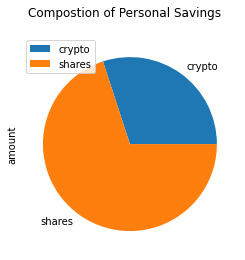

In [109]:
# Plot savings pie chart
df_savings.plot(kind = "pie",title="Compostion of Personal Savings", subplots = True)

In [123]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_amount_savings = emergency_fund + crypto + shares
# print(total_amount_savings)
# left_to_save = 
# Validate saving health
if total_amount_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_amount_savings == emergency_fund:
    print("Congratulations! You have have some money in your emergency fund; keep saving.")
elif total_amount_savings < emergency_fund:
    print(f"You're doing ok...but get{total_amount_savings - emergency_fund}")
else: 
    print(f"You're doing ok...but get")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [111]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-10-21', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-10-21', tz='America/New_York').isoformat()

In [112]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api_object.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data.index = df_stock_data.index.date
# Display sample data
df_stock_data.head()

AGG                                        SPY                  \
              open    high     low   close     volume    open    high     low   
2015-10-21  109.73  109.95  109.73  109.89  1119723.0  203.61  203.79  201.65   
2015-10-22  109.90  110.05  109.83  109.94  1817244.0  202.98  205.51  202.81   
2015-10-23  109.79  109.79  109.69  109.74  1344632.0  207.25  207.95  206.30   
2015-10-26  109.85  109.90  109.74  109.79  1385981.0  207.30  207.37  206.56   
2015-10-27  110.03  110.03  109.88  109.95  1791888.0  206.20  207.00  205.79   

                               
             close     volume  
2015-10-21  201.82   83704739  
2015-10-22  205.22  121670959  
2015-10-23  207.51  103135843  
2015-10-26  206.97   51484043  
2015-10-27  206.58   62899344

In [113]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [114]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                                     SPY  \
              open    high     low   close     volume daily_return    open   
2015-10-21  109.73  109.95  109.73  109.89  1119723.0          NaN  203.61   
2015-10-22  109.90  110.05  109.83  109.94  1817244.0     0.000455  202.98   
2015-10-23  109.79  109.79  109.69  109.74  1344632.0    -0.001819  207.25   
2015-10-26  109.85  109.90  109.74  109.79  1385981.0     0.000456  207.30   
2015-10-27  110.03  110.03  109.88  109.95  1791888.0     0.001457  206.20   

                                                            
              high     low   close     volume daily_return  
2015-10-21  203.79  201.65  201.82   83704739          NaN  
2015-10-22  205.51  202.81  205.22  121670959     0.016847  
2015-10-23  207.95  206.30  207.51  103135843     0.011159  
2015-10-26  207.37  206.56  206.97   51484043    -0.002602  
2015-10-27  207.00  205.79  206.58   62899344    -0.001884

In [115]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003101,0.990569,1.002694,0.996939,0.992851,0.996986,0.989884,1.001053,0.993081,1.003958,...,1.001202,0.991621,1.002126,1.007442,0.988887,1.005057,1.002745,0.998507,1.000481,0.998483
2,1.005962,0.993442,1.005910,1.009938,0.998042,0.998522,0.988196,1.004569,1.001823,1.004395,...,0.998067,0.993027,1.007939,1.000730,0.979706,1.000499,1.004634,0.993221,1.016955,1.007283
3,0.997087,0.999265,1.014298,1.016992,1.005988,0.992770,0.988444,1.014596,1.004005,1.005717,...,1.001578,0.986093,1.005211,1.003285,0.989595,0.999633,1.003939,0.996315,1.017094,1.002955
4,0.991318,1.002306,1.020840,1.025304,1.006627,0.992208,0.991992,1.022315,0.991850,1.000111,...,0.997872,0.980316,1.007369,1.001378,0.990626,0.996006,1.013376,0.994470,1.017768,1.010809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.038251,5.414753,2.446705,3.525148,2.254812,8.605997,5.442610,4.271909,3.404925,3.759314,...,3.057807,3.406306,4.135107,4.393267,3.107437,2.552430,3.803179,10.535335,4.490837,4.524169
7557,3.058976,5.449953,2.457415,3.507362,2.250100,8.679728,5.373908,4.259111,3.381977,3.753939,...,3.061862,3.395504,4.119509,4.384648,3.098481,2.550952,3.834474,10.491101,4.501713,4.538026
7558,3.061820,5.469923,2.465087,3.496761,2.242295,8.665815,5.366259,4.308067,3.382746,3.765259,...,3.060362,3.395042,4.131707,4.365504,3.081945,2.542440,3.857569,10.454613,4.518591,4.550371
7559,3.069819,5.415414,2.455283,3.489048,2.243294,8.690906,5.363160,4.279487,3.388975,3.804091,...,3.067628,3.386652,4.150573,4.363498,3.101516,2.557477,3.831882,10.397114,4.506800,4.567326


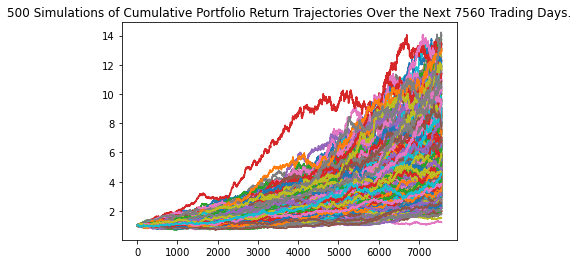

In [116]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

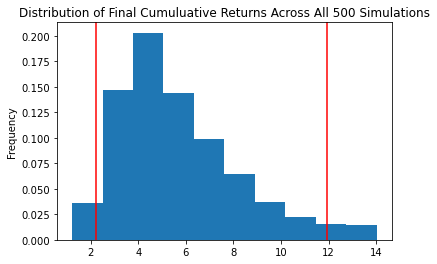

In [117]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [118]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.649412
std               2.499069
min               1.212897
25%               3.867819
50%               5.079182
75%               6.829479
max              14.021177
95% CI Lower      2.199437
95% CI Upper     11.946009
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [120]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $43988.75 and $238920.18


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [121]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]* initial_investment,2)
ci_upper = round(tbl[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $65983.12 and $358380.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [124]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [125]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.982499,1.001861,1.004591,1.003710,1.018512,1.003653,0.999427,0.996866,0.992429,0.981860,...,0.989115,1.006860,0.990193,1.018120,0.981079,0.983848,1.002944,0.996208,0.996628,0.989392
2,0.957377,1.004887,1.012409,1.002376,1.026503,1.015794,1.005416,0.999918,0.988158,0.968573,...,0.979885,1.013792,0.999538,1.014993,0.988134,0.978833,0.986751,1.000202,0.995692,0.974869
3,0.979346,1.023070,1.028198,0.995270,1.011171,0.994706,1.010687,1.004618,0.991803,0.962995,...,0.993055,1.016979,1.021752,1.018702,0.981900,0.982663,0.984861,1.003000,0.995320,0.978110
4,0.992050,1.011748,1.031909,0.990831,1.014160,0.994486,1.001331,0.999951,1.003309,0.979190,...,0.990240,1.034916,1.018553,1.025056,0.983798,0.995452,0.975809,1.004472,1.008935,0.981049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.054024,2.627815,2.602902,2.699833,1.065942,1.632986,1.289375,1.045416,1.685945,1.240698,...,2.015074,1.537547,2.466793,1.673267,2.275202,2.094952,0.865032,1.017738,2.641364,1.643862
1257,1.035337,2.641375,2.584357,2.738241,1.082706,1.649458,1.292041,1.054720,1.717345,1.241297,...,2.044464,1.521672,2.427794,1.668906,2.281746,2.123258,0.879725,1.011489,2.652359,1.643798
1258,1.023246,2.619955,2.562847,2.705244,1.080149,1.662974,1.292123,1.046465,1.708179,1.244498,...,2.026080,1.528700,2.437214,1.658007,2.319159,2.152561,0.899300,1.015511,2.636552,1.628692
1259,1.019073,2.622240,2.537385,2.739706,1.084292,1.660542,1.290073,1.026624,1.725405,1.231799,...,1.983105,1.523099,2.410912,1.622632,2.350784,2.137853,0.896357,1.015273,2.644217,1.614332


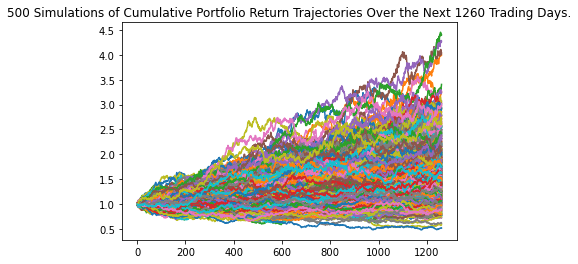

In [126]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

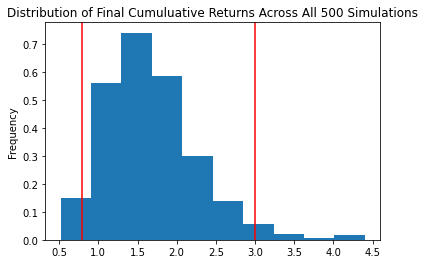

In [127]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

In [128]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.675713
std               0.581167
min               0.517636
25%               1.256420
50%               1.606852
75%               1.988573
max               4.400626
95% CI Lower      0.797631
95% CI Upper      2.993747
Name: 1260, dtype: float64


In [130]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]* initial_investment,2)
ci_upper_five = round(tbl_five[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47857.85 and $179624.79


### Ten Years Retirement Option

In [133]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.30,.70],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [134]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010718,0.993501,0.988906,0.985277,0.997933,1.002479,1.012480,1.003435,1.015997,0.992915,...,0.997843,1.009619,0.999813,1.008823,1.015325,1.008657,0.999973,0.993461,0.990452,0.989939
2,1.016663,0.994753,0.985442,0.975522,1.005554,1.007897,1.017789,1.002565,1.016549,0.998298,...,0.993709,1.010864,0.980913,1.011571,1.021920,1.033361,0.979317,1.011354,0.980016,0.981577
3,1.013431,0.999880,0.985237,0.964746,0.995284,1.007998,1.013145,1.016145,1.009070,0.997700,...,0.985479,1.013464,0.983391,1.015992,1.014034,1.031936,0.982600,1.007307,0.977881,0.966487
4,1.006772,1.009125,0.994905,0.970298,0.990520,0.990614,1.021887,1.022444,1.013113,0.985189,...,0.987807,1.007913,0.993553,1.011190,1.014588,1.038010,0.966575,0.996423,0.973641,0.977597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.158713,2.325991,2.418269,1.760582,4.056544,2.558312,6.192561,2.091841,5.646477,3.470103,...,2.307390,5.491814,1.809588,2.099828,0.888527,2.468491,1.394103,1.953575,1.156393,0.866951
2517,2.143650,2.355152,2.444693,1.784380,4.058690,2.561269,6.240820,2.090071,5.692579,3.428650,...,2.340805,5.563466,1.829127,2.108200,0.896486,2.451685,1.379318,1.951497,1.147339,0.863447
2518,2.164077,2.355988,2.451532,1.798700,4.095253,2.584207,6.252544,2.073364,5.693770,3.434768,...,2.384957,5.658630,1.834885,2.104772,0.901531,2.443184,1.369510,1.938625,1.154546,0.863415
2519,2.162860,2.316906,2.467435,1.832092,4.094015,2.590276,6.293151,2.093508,5.718512,3.458888,...,2.360532,5.647922,1.815045,2.077317,0.908261,2.428174,1.362271,1.942167,1.158196,0.862914


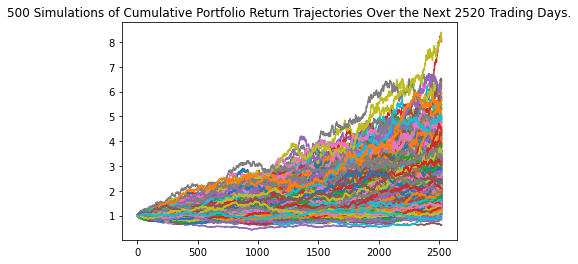

In [135]:
# Plot simulation outcomes
line_plot = MC_tenyear.plot_simulation()

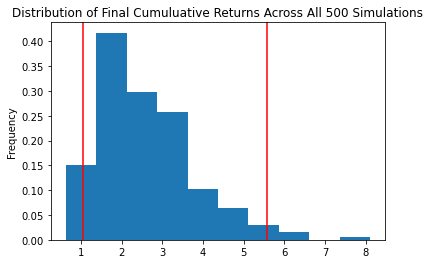

In [136]:
# Plot probability distribution and confidence intervals
dist_plot = MC_tenyear.plot_distribution()

In [137]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.607086
std               1.182106
min               0.631136
25%               1.758494
50%               2.337399
75%               3.272507
max               8.106313
95% CI Lower      1.065423
95% CI Upper      5.567081
Name: 2520, dtype: float64


In [139]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]* initial_investment,2)
ci_upper_ten = round(tbl_ten[9]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63925.37 and $334024.86
